# BUSINESS UNDERSTANDING

# DATA UNDERSTANDING

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#nltk.download('punkt')
#!pip install textblob
#nltk.download('punkt')
#nltk.download('wordnet')

In [2]:
# Loading the dataset
data = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding = 'latin1')
data

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [3]:
# Checking the dataset's head
data.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [4]:
# Checking the dataset's tail
data.tail(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9083,"Google says the future is all around you! (ie,...",NaN,No emotion toward brand or product
9084,"Google says the future is location, location, ...",NaN,No emotion toward brand or product
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion
9086,Google says: want to give a lightning talk to ...,NaN,No emotion toward brand or product
9087,"@mention Yup, but I don't have a third app yet...",NaN,No emotion toward brand or product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


In [5]:
# Checking the shape
data.shape

(9093, 3)

In [6]:
# Description
data.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [7]:
# Checking for duplicates
data.duplicated().sum()

22

In [8]:
# Checking for missing values
data.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [9]:
# Value_counts for the data
print(f"""
{data.emotion_in_tweet_is_directed_at.value_counts()}
-----------------------------------------------------------------------
{data.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()}
""")


iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64
-----------------------------------------------------------------------
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64



# DATA PREPARATION

General steps:
- Rename columns
- Remove missing value from tweet_text
- Handle the duplicated data
- Remove Capitalization
- Remove Punctuation
- Remove stop words
- Fill emotion_in_tweet_is_directed_at with their appropriate values

In [10]:
# Rename the columns
data.rename(columns={"tweet_text":"tweet","emotion_in_tweet_is_directed_at":"brand",
                    "is_there_an_emotion_directed_at_a_brand_or_product":"sentiment"},inplace=True)
data.head()

,tweet,brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [11]:
# Drop missing row in tweet column 
data.dropna(subset=["tweet"],inplace=True)
data.isna().sum()

tweet           0
brand        5801
sentiment       0
dtype: int64

In [12]:
# Drop the duplicated data
data.drop_duplicates(inplace=True)
# Check if the duplicates have been dropped
data.duplicated().sum()

0

In [13]:
# Remove Capitalization in tweets
data["tweet"] = data["tweet"].str.lower()
# Preview data
data.head()

,tweet,brand,sentiment
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative emotion
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,Positive emotion


In [14]:
# Remove user names from tweets
def user_name(df):
    """
    This function removes the user names and hyperlinks from tweets column
    """
    text = []
    for words in df.tweet:
        text.append(words)
    texts = []
    for x in range(len(text)):
        users_removed = " ".join(word for word in text[x].split() if not word.startswith(("@",".","http:","{link}")))
        texts.append(users_removed)
    return texts

In [15]:
# Update the data without user names into a dataframe
clean_data = pd.DataFrame(user_name(data),columns=["tweet"])
data.update(clean_data)
data.isna().sum()

tweet           0
brand        5788
sentiment       0
dtype: int64

In [16]:
# Remove  punctuation
data['tweet'] = data.tweet.str.replace('[^\w\s]','')
data.head()

/tmp/ipykernel_20221/1360861162.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['tweet'] = data.tweet.str.replace('[^\w\s]','')


,tweet,brand,sentiment
0,i have a 3g iphone after 3 hrs tweeting at ris...,iPhone,Negative emotion
1,know about awesome ipadiphone app that youll ...,iPad or iPhone App,Positive emotion
2,can not wait for ipad 2 also they should sale ...,iPad,Positive emotion
3,i hope this years festival isnt as crashy as t...,iPad or iPhone App,Negative emotion
4,great stuff on fri sxsw marissa mayer google t...,Google,Positive emotion


In [17]:
# Remove stop words and punctuation
stopwords = stopwords.words('english')
stopwords += list(string.punctuation)
data['tweet'] = data.tweet.apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))


In [18]:
# Remove Special characters
data['tweet'] = data.tweet.str.replace('#','')
data['tweet'] = data.tweet.str.replace('@','')

In [19]:
# Priview the data
data.head(10)

,tweet,brand,sentiment
0,3g iphone 3 hrs tweeting rise_austin dead need...,iPhone,Negative emotion
1,know awesome ipadiphone app youll likely appre...,iPad or iPhone App,Positive emotion
2,wait ipad 2 also sale sxsw,iPad,Positive emotion
3,hope years festival isnt crashy years iphone a...,iPad or iPhone App,Negative emotion
4,great stuff fri sxsw marissa mayer google tim ...,Google,Positive emotion
5,new ipad apps speechtherapy communication show...,NaN,No emotion toward brand or product
7,beautifully smart simple idea rt wrote hollerg...,Android,Positive emotion
8,counting days sxsw plus strong canadian dollar...,iPad or iPhone App,Positive emotion
9,excited meet sxsw show sprint galaxy still run...,Apple,Positive emotion
10,find amp start impromptu parties sxsw cant wai...,Android,Positive emotion


In [20]:
# Change the brand names to either Apple or Google
brands = {
    "iPhone":"Apple",
    "iPad": "Apple",
    "Android": "Google",
    "Android App": "Google",
    "iPad or iPhone App": "Apple",
    "Other Google product or service": "Google",
    "Other Apple product or service": "Apple"
}
data.replace({"brand":brands},inplace=True)

data.head()

,tweet,brand,sentiment
0,3g iphone 3 hrs tweeting rise_austin dead need...,Apple,Negative emotion
1,know awesome ipadiphone app youll likely appre...,Apple,Positive emotion
2,wait ipad 2 also sale sxsw,Apple,Positive emotion
3,hope years festival isnt crashy years iphone a...,Apple,Negative emotion
4,great stuff fri sxsw marissa mayer google tim ...,Google,Positive emotion


In [21]:
# Fill the column in brand with their respective values
dict = {
    "iphone": "Apple",
    "android": "Google",
    "google": "Google",
    "ipad": "Apple",
    "ipad/iphone": "Apple",
    "apple": "Apple",
    "itunes": "Apple"
}

for key,value in dict.items():
    data["brand"][data.tweet.str.contains(key)] = value
data.brand.value_counts()

Apple     5630
Google    2985
Name: brand, dtype: int64

In [22]:
# Check null values
data.brand.isna().sum()

# Replace null values with Others
data.brand.fillna("Others",inplace=True)


In [23]:
# Check if the missing values have been handled
data.isna().sum()

tweet        0
brand        0
sentiment    0
dtype: int64

In [24]:
# Preview the data
data.head(10)

,tweet,brand,sentiment
0,3g iphone 3 hrs tweeting rise_austin dead need...,Apple,Negative emotion
1,know awesome ipadiphone app youll likely appre...,Apple,Positive emotion
2,wait ipad 2 also sale sxsw,Apple,Positive emotion
3,hope years festival isnt crashy years iphone a...,Apple,Negative emotion
4,great stuff fri sxsw marissa mayer google tim ...,Google,Positive emotion
5,new ipad apps speechtherapy communication show...,Apple,No emotion toward brand or product
7,beautifully smart simple idea rt wrote hollerg...,Apple,Positive emotion
8,counting days sxsw plus strong canadian dollar...,Apple,Positive emotion
9,excited meet sxsw show sprint galaxy still run...,Google,Positive emotion
10,find amp start impromptu parties sxsw cant wai...,Google,Positive emotion


# FEATURE ENGINEERING

- Tokenization
- lemmatization and Stemming
- Feature distribution
- Univariate and Bivariate analysis

In [25]:
# Tokenization
from nltk.tokenize import word_tokenize

word_tokens = []

for words in data["tweet"]:
    word_tokens.append(word_tokenize(words))

In [26]:
!pip install textblob

In [35]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
from textblob import Word

lemma = WordNetLemmatizer()

data['lemmatization'] = data.tweet.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 


In [41]:
# Feature Distribution

data['sentiment'].value_counts()

Neutral emotion     5375
Positive emotion    2970
Negative emotion     569
I can't tell         156
Name: sentiment, dtype: int64

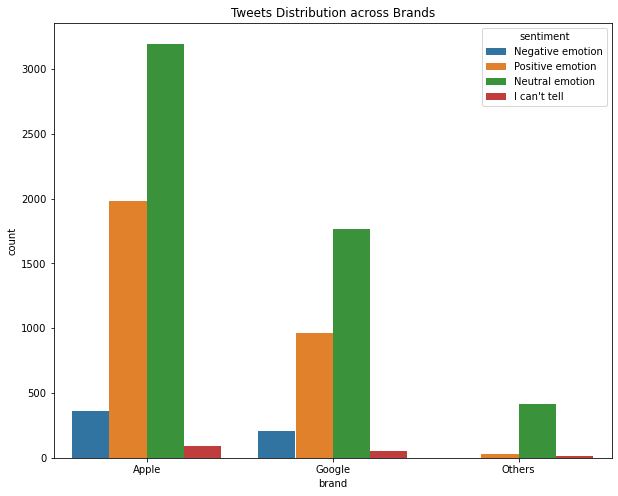

In [44]:
plt.figure(figsize=(10, 8))
sns.countplot(x='brand', data=data, hue='sentiment')
plt.title('Tweets Distribution across Brands')
plt.show()

In [ ]:
# Univariate and Bivariate analysis



# MODELING

# EVALUATION

# DEPLOYMENT